In [1]:
# библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import scipy.stats as sts

In [2]:
# загружаем файл
data = pd.read_csv("../data/final.csv")

data["start_date"] = pd.to_datetime(data["start_date"])
data["end_date"] = pd.to_datetime(data["end_date"])
data["genres"] = data["genres"].apply(eval)
data["themes"] = data["themes"].apply(eval)

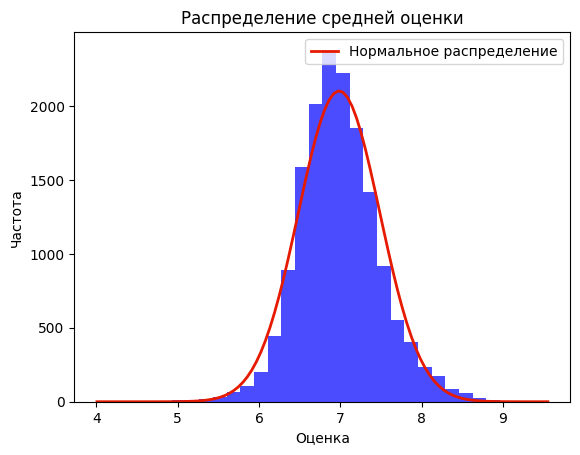

In [3]:
# Построение гистограммы
counts, bin_edges, _ = plt.hist(data["score"], bins=30, color='blue', alpha=0.7)

# Вычисление площади под гистограммой
bin_width = bin_edges[1] - bin_edges[0]  # Ширина одного бина
area = np.sum(counts) * bin_width  # Площадь под гистограммой


plt.title('Распределение средней оценки')
plt.xlabel('Оценка')
plt.ylabel('Частота')

mu, std = sts.norm.fit(data["score"])  # Оценка параметров распределения
xmin, xmax = plt.xlim()  # Границы графика
x = np.linspace(xmin, xmax, 100)  # Точки для построения кривой
p = sts.norm.pdf(x, mu, std)  # Плотность нормального распределения

plt.plot(x, area * p, linewidth=2, label='Нормальное распределение', color=(0.9, 0.1, 0.0, 1.0))

plt.legend()
plt.show()

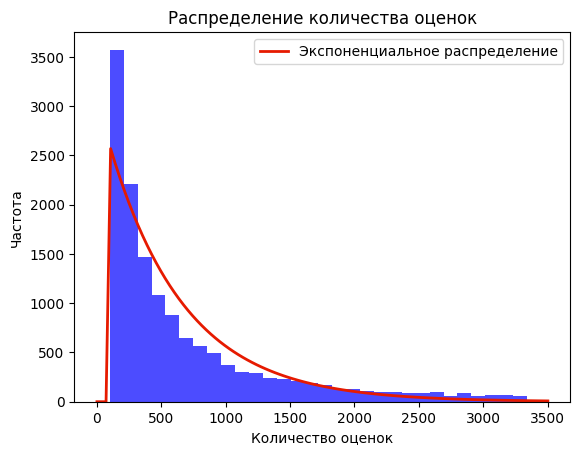

In [4]:
# Построение гистограммы
scored_by = data.sort_values(by="scored_by", ascending=False)["scored_by"]
scored_by = scored_by[round(len(scored_by) * 0.1):]


counts, bin_edges, _ = plt.hist(scored_by, bins=30, color='blue', alpha=0.7)
# Вычисление площади под гистограммой
bin_width = bin_edges[1] - bin_edges[0]  # Ширина одного бина
area = np.sum(counts) * bin_width  # Площадь под гистограммой


plt.title('Распределение количества оценок')
plt.xlabel('Количество оценок')
plt.ylabel('Частота')

loc, scale = sts.expon.fit(scored_by)  # Оценка параметров распределения
xmin, xmax = plt.xlim()  # Границы графика
x = np.linspace(0, xmax, 100)  # Точки для построения кривой
p = sts.expon.pdf(x, loc, scale)  # Плотность экспоненциального распределения
plt.plot(x, area * p, linewidth=2, label='Экспоненциальное распределение', color=(0.9, 0.1, 0.0, 1.0))

plt.legend()
plt.show()



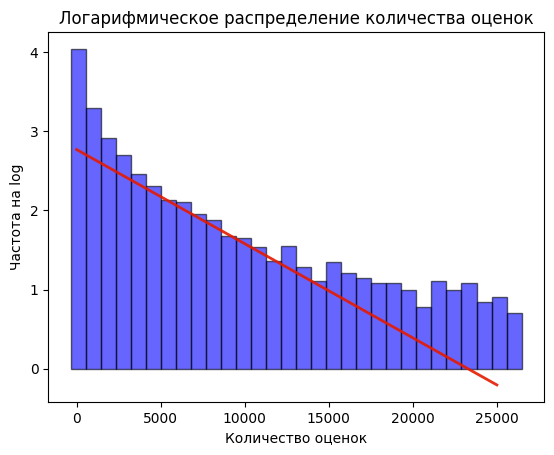

In [5]:
# Построение гистограммы
scored_by = data.sort_values(by="scored_by", ascending=False)["scored_by"]
scored_by = scored_by[round(len(scored_by) * 0.01):]


counts, bin_edges, _ = plt.hist(scored_by, bins=30, color='blue', alpha=0.7)
plt.close()
log_counts = np.log10(np.array(counts) + 1)

plt.bar(bin_edges[:-1], log_counts,width=np.diff(bin_edges), alpha=0.6, color='b', edgecolor='black')

lambd = 1.0 / scale 
func = lambda x: -np.log10(lambd) - np.log10(np.e) / np.log10(area) * lambd * x

plt.plot([0, 25000], [func(0), func(25000)], linewidth=2, label='Среднея оценка', color=(0.9, 0.1, 0.0, 0.9))

plt.title('Логарифмическое распределение количества оценок')
plt.xlabel('Количество оценок')
plt.ylabel('Частота на log')

plt.show()

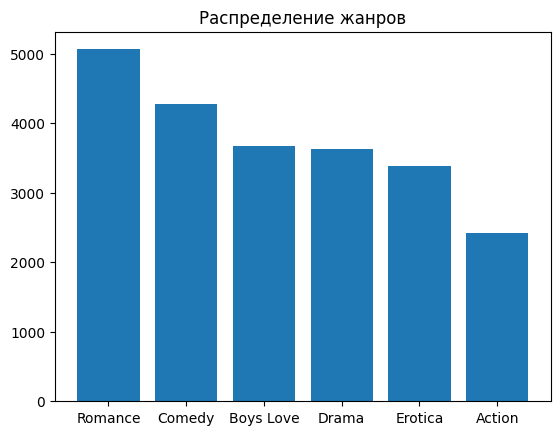

In [21]:
# круговая диаграмма жанров
all_genres = [genre for sublist in data["genres"] for genre in sublist]
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"])
genre_df = genre_df.sort_values(by="Count", ascending=False)

# количество видных жанров
view_genres = 6

top_genres = genre_df.head(view_genres)

# other_count = genre_df["Count"][view_genres:].sum()
# top_genres = pd.concat([top_genres, pd.DataFrame({"Genre": ["Другие"], "Count": [other_count]})])

sizes =  top_genres["Count"]
labels = top_genres["Genre"]


plt.bar(labels, sizes)
plt.title("Распределение жанров")
plt.show()

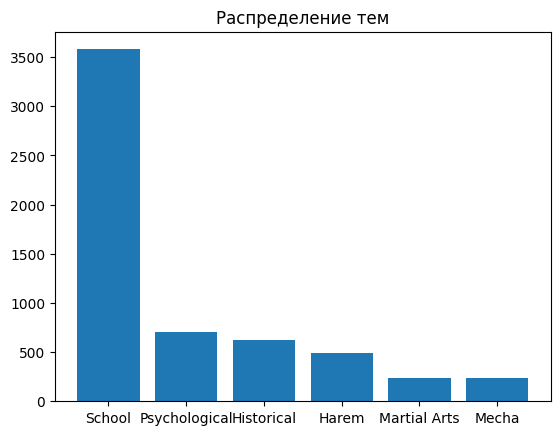

In [23]:
# круговая диаграмма тем
all_themes = [theme for sublist in data["themes"] for theme in sublist]
theme_counts = Counter(all_themes)

theme_df = pd.DataFrame(theme_counts.items(), columns=["Theme", "Count"])
theme_df = theme_df.sort_values(by="Count", ascending=False)

# количество видных тем
view_themes = 6

top_themes = theme_df.head(view_themes)

# other_count = theme_df["Count"][view_themes:].sum()
# top_themes = pd.concat([top_themes, pd.DataFrame({"Theme": ["Другие"], "Count": [other_count]})])

sizes =  top_themes["Count"]
labels = top_themes["Theme"]

plt.bar(labels, sizes)
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Распределение тем")
plt.show()

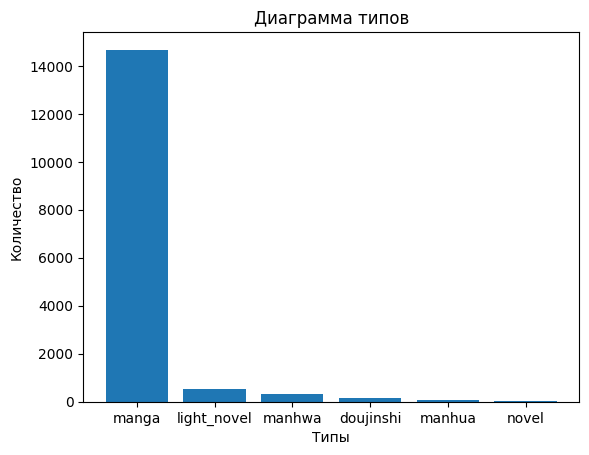

In [8]:
# диаграмма типов
all_types = [type for type in data["type"]]
type_counts = Counter(all_types)

type_df = pd.DataFrame(type_counts.items(), columns=["Type", "Count"])
type_df = type_df.sort_values(by="Count", ascending=False)


sizes =  type_df["Count"]
labels = type_df["Type"]


plt.bar(labels, sizes)

# Добавление подписей
plt.xlabel("Типы")
plt.ylabel("Количество")
plt.title("Диаграмма типов")
plt.show()

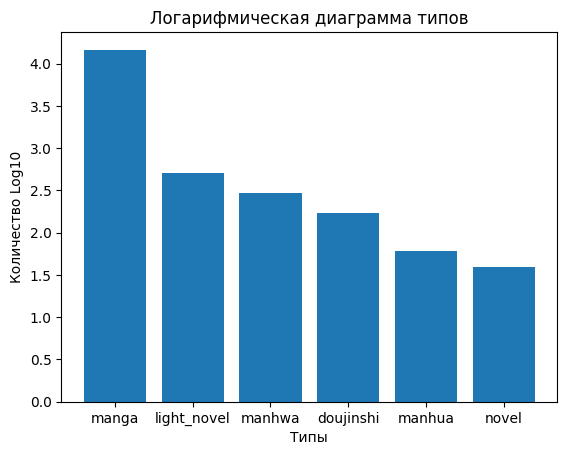

In [9]:
# диаграмма типов c log10
all_types = [type for type in data["type"]]
type_counts = Counter(all_types)

type_df = pd.DataFrame(type_counts.items(), columns=["Type", "Count"])
type_df = type_df.sort_values(by="Count", ascending=False)


sizes =  np.log10(type_df["Count"] + 1) 
labels = type_df["Type"]


plt.bar(labels, sizes)

# Добавление подписей
plt.xlabel("Типы")
plt.ylabel("Количество Log10")
plt.title("Логарифмическая диаграмма типов")
plt.show()

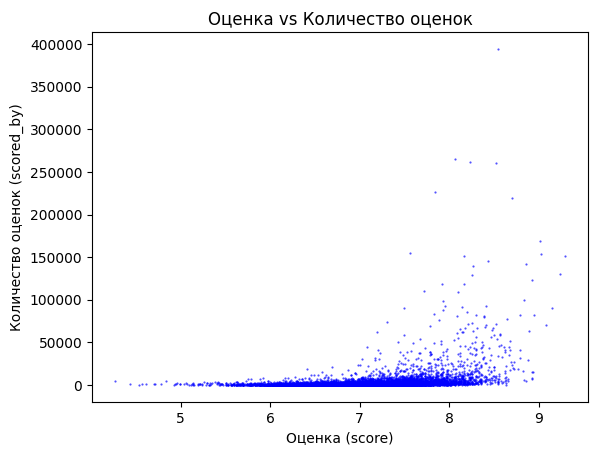

In [10]:
# Оценка vs количесиво оценок
x = data["score"]  # Ось X: score
y = data["scored_by"] # Ось Y: scored_by

# Построение точечной диаграммы
plt.scatter(x, y,s = 0.3, color='blue', alpha=0.7)

# Добавление подписей
plt.xlabel("Оценка (score)")
plt.ylabel("Количество оценок (scored_by)")
plt.title("Оценка vs Количество оценок")

# Отображение диаграммы
plt.show()

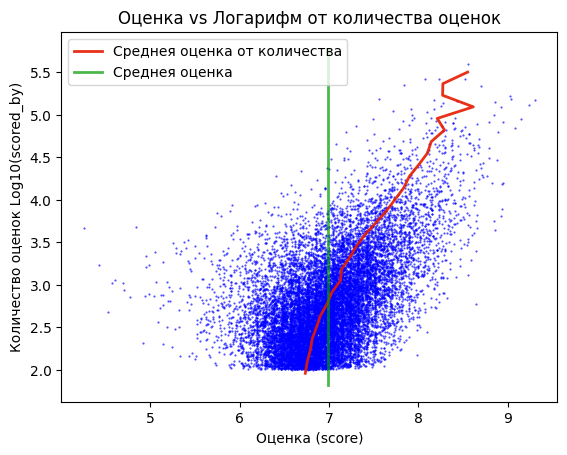

In [11]:
# Оценка vs log10 количесиво оценок 
x = data["score"]  # Ось X: score
y = np.log10(data["scored_by"] + 1)  # Ось Y: scored_by


# Построение точечной диаграммы
plt.scatter(x, y,s = 0.3, color='blue', alpha=0.7)

ymin, ymax = plt.ylim()
Ey = np.linspace(ymin, ymax, 30)
Ex = []
for i in range(len(Ey) - 1):
    y1 = 10 ** Ey[i] - 1
    y2 = 10 ** Ey[i + 1] - 1
    Ex.append(data[(data["scored_by"] >= y1) & (data["scored_by"] < y2)]["score"].mean())

plt.plot(Ex, Ey[:-1], linewidth=2, label='Среднея оценка от количества', color=(0.9, 0.1, 0.0, 0.9))

Eallx = data["score"].mean()
plt.plot([Eallx, Eallx], [ymin, ymax], linewidth=2, label='Среднея оценка', color=(0.0, 0.6, 0.0, 0.7))

# Добавление подписей
plt.xlabel("Оценка (score)")
plt.ylabel("Количество оценок Log10(scored_by)")
plt.title("Оценка vs Логарифм от количества оценок")

plt.legend()
# Отображение диаграммы
plt.show()

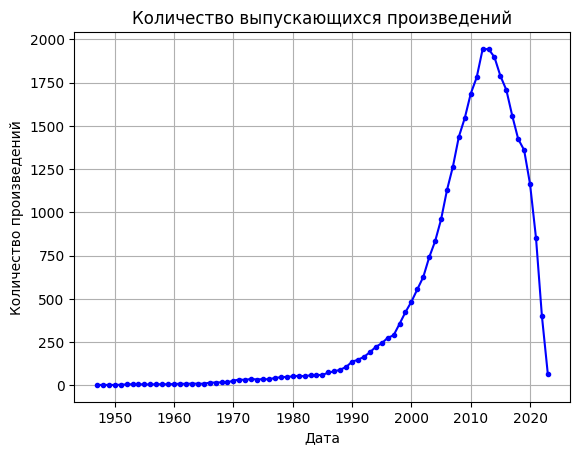

In [12]:
#Количество произведений в зависимости от даты
date_range = pd.date_range(start=data["start_date"].min(), end=data["end_date"].max(), freq="YE")
# Функция для подсчета количества сериалов в конкретный месяц
def count_series_in_month(month):
    return data[(data["start_date"] <= month) & (data["end_date"] >= month)].shape[0]

# Применяем функцию к каждому месяцу
series_count = [count_series_in_month(month) for month in date_range]

# Построение графика
plt.plot(date_range, series_count, marker=".", linestyle="-", color="blue")

# Добавление подписей
plt.xlabel("Дата")
plt.ylabel("Количество произведений")
plt.title("Количество выпускающихся произведений")
plt.grid(True)

# Отображение графика
plt.show()


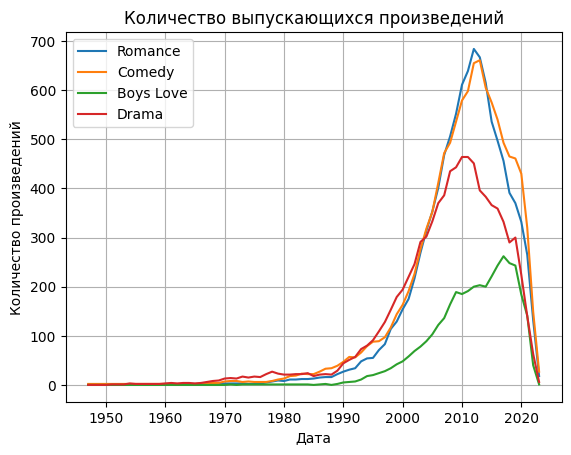

In [13]:
#Количество произведений в зависимости от даты для популярных жанров
def count_series_by_genre_in_month(month, target_genre):
    return data[(data["start_date"] <= month) & (data["end_date"] >= month)]["genres"].apply(lambda x: target_genre in x).sum()

main_genres = list(genre_df["Genre"][:view_genres])
series_count_genre = [[count_series_by_genre_in_month(month, genre) for month in date_range] for genre in main_genres]

# Построение графика
for i in range(view_genres):
    plt.plot(date_range, series_count_genre[i], label=main_genres[i], linestyle="-")

# Добавление подписей
plt.xlabel("Дата")
plt.ylabel("Количество произведений")
plt.title("Количество выпускающихся произведений")
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

